In [1]:
### Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
### Importing data

# Comparing insert sort and merge sort
dataInsertMergeLargeN = pd.read_csv("./result/result_InsertMerge.csv")
dataInsertMergeSmallN = pd.read_csv("./result/result_InsertMergeFocused.csv")

In [3]:
dataInsertMergeLargeN.describe()

,n,insertTime,mergeTime
count,6.000000,6.000000,6.000000
mean,26000.833333,104969.769835,64.659238
std,18075.250398,109161.265611,47.630441
min,1617.000000,285.066843,2.956867
25%,14301.750000,24370.303035,32.902360
50%,25904.000000,75694.087625,62.317014
75%,37697.500000,158351.923943,95.148087
max,50517.000000,284978.466034,131.175280


In [4]:
dataInsertMergeSmallN.describe()

,n,insertTime,mergeTime
count,25314.000000,25314.000000,25314.000000
mean,51.310026,0.625964,0.061035
std,55.704103,2.753011,0.084817
min,2.000000,0.000000,0.000000
25%,22.000000,0.051260,0.020981
50%,43.000000,0.200033,0.046253
75%,71.000000,0.549078,0.082970
max,609.000000,40.160894,1.052141


# Comparing Insert Sort and Merge Sort with Large N

In [5]:
# Creating sub dataframes
insertLargeN = dataInsertMergeLargeN[["n","insertTime"]]
mergeLargeN = dataInsertMergeLargeN[["n","mergeTime"]]

Text(0.5, 1.0, 'Merge Sort')

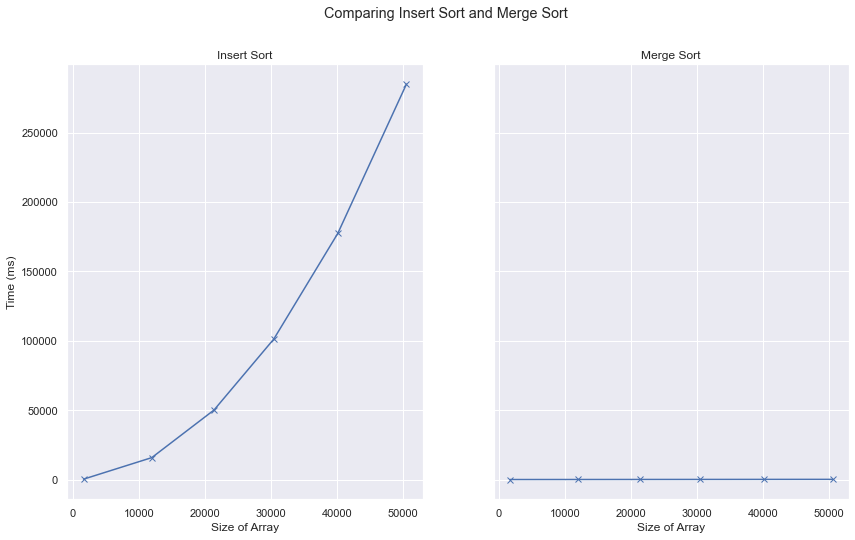

In [6]:
# Plot
# sns.scatterplot(data=dataInsertMergeLargeN, x='n', y='insertTime')

fig, ax1 = plt.subplots(1, 2, figsize=(14,8), sharey=True)

fig.suptitle("Comparing Insert Sort and Merge Sort")

ax1[0].plot(insertLargeN['n'],insertLargeN['insertTime'], 'x-')
ax1[0].set_ylabel('Time (ms)')
ax1[0].set_xlabel('Size of Array')
ax1[0].set_title('Insert Sort')

ax1[1].plot(mergeLargeN['n'],mergeLargeN['mergeTime'], 'x-')
ax1[1].set_xlabel('Size of Array')
ax1[1].set_title('Merge Sort')



# Finding best cross over point

In [7]:
# Creating sub dataframes
insertSmallN = dataInsertMergeSmallN[["n","insertTime"]]
mergeSmallN = dataInsertMergeSmallN[["n","mergeTime"]]

Text(0.5, 1.0, 'Merge Sort')

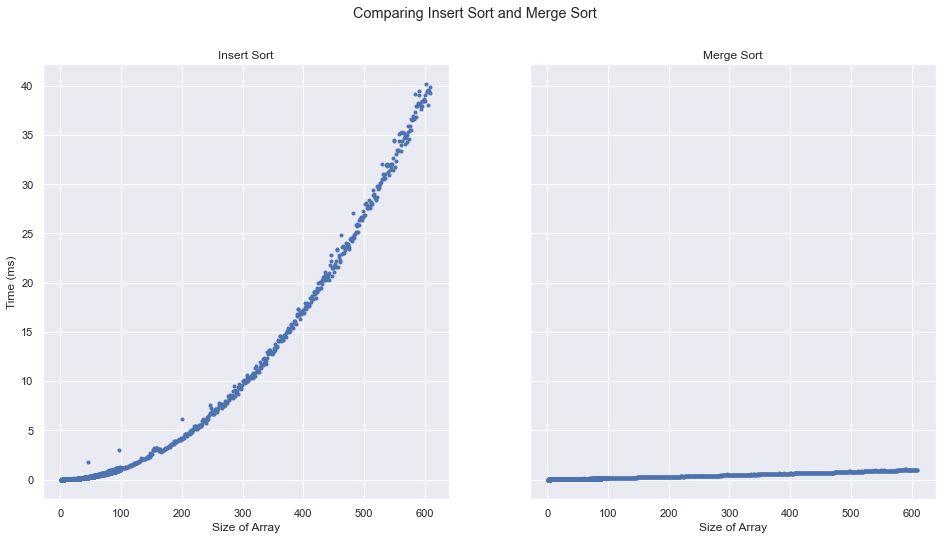

In [8]:
fig2, ax2 = plt.subplots(1, 2, figsize=(16,8), sharey=True)

fig2.suptitle("Comparing Insert Sort and Merge Sort")

ax2[0].plot(insertSmallN['n'],insertSmallN['insertTime'], '.')
ax2[0].set_ylabel('Time (ms)')
ax2[0].set_xlabel('Size of Array')
ax2[0].set_title('Insert Sort')

ax2[1].plot(mergeSmallN['n'],mergeSmallN['mergeTime'], '.')
ax2[1].set_xlabel('Size of Array')
ax2[1].set_title('Merge Sort')

## Initial Findings
We can observe that even at a significantly smaller N, the difference in time complexity between Insert Sort and Merge Sort is very prominant. We'll compare the data where N<=15.

In [9]:
# New dataframe
dataFiltered = dataInsertMergeSmallN[(dataInsertMergeSmallN.n <= 15) & (dataInsertMergeSmallN.insertTime <= 0.04)]
dataFiltered.describe()

,n,insertTime,mergeTime
count,4519.000000,4519.000000,4519.000000
mean,8.127241,0.009847,0.006692
std,4.136554,0.008038,0.004016
min,2.000000,0.000000,0.000000
25%,4.000000,0.002861,0.003099
50%,8.000000,0.007868,0.006199
75%,12.000000,0.015974,0.010014
max,15.000000,0.037909,0.020027


Text(0.5, 1.0, 'Merge Sort')

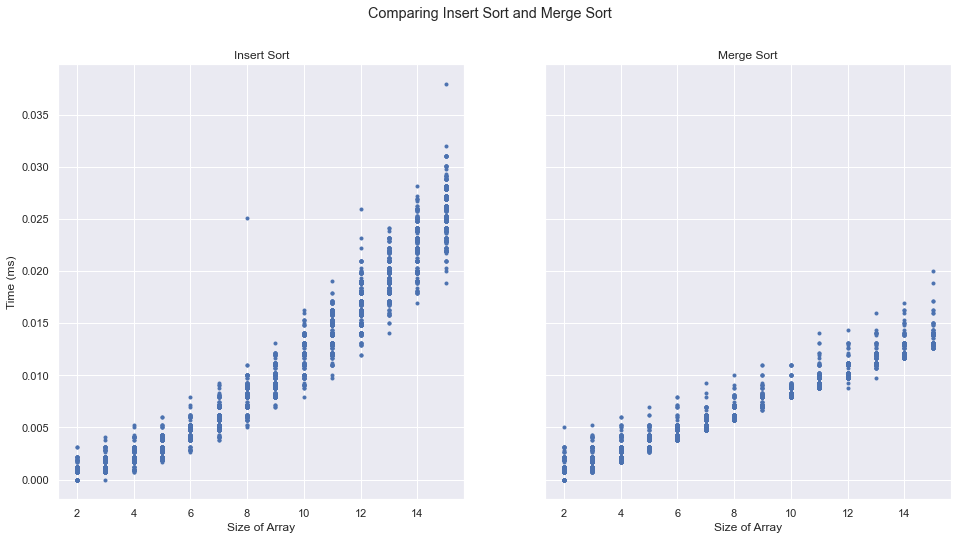

In [10]:
# Creating sub dataframes
insertFiltered = dataFiltered[["n","insertTime"]]
mergeFiltered = dataFiltered[["n","mergeTime"]]

# Plotting
fig3, ax3 = plt.subplots(1, 2, figsize=(16,8), sharey=True)

fig3.suptitle("Comparing Insert Sort and Merge Sort")

ax3[0].plot(dataFiltered['n'],dataFiltered['insertTime'], '.')
ax3[0].set_ylabel('Time (ms)')
ax3[0].set_xlabel('Size of Array')
ax3[0].set_title('Insert Sort')

ax3[1].plot(dataFiltered['n'],dataFiltered['mergeTime'], '.')
ax3[1].set_xlabel('Size of Array')
ax3[1].set_title('Merge Sort')

## Finding optimal `n`

We can observe that in both scatter plots, the region where `n<=8` is very similar. Furthermore, it is obvious that the time taken for Insert Sort is higher than that of Merge Sort when `n>8`.

Since the region of interest (`2<=n<=8`) is very small, we can estimate the smaller region using linear functions to determine the most optimal `n` such that `timeInsertSort(x<n)` is less than `timeMergeSort(x<n)`.

In [11]:
# Trimming data size down to region of interest
dataInterest = dataInsertMergeSmallN[(dataInsertMergeSmallN.n <= 8)]

nReshaped = dataInterest['n'].to_numpy().reshape((-1,1))

In [12]:
# Fitting models
insertModel = LinearRegression().fit(nReshaped, dataInterest['insertTime'])
mergeModel = LinearRegression().fit(nReshaped, dataInterest['mergeTime'])

print(f"Pearson Correlation\nInsert: {insertModel.score(nReshaped, dataInterest['insertTime'])}\nMerge: {mergeModel.score(nReshaped, dataInterest['mergeTime'])}")

Pearson Correlation
Insert: 0.8654554966937785
Merge: 0.8859780369226069


In [13]:
# Plotting predictions
rangeOfX = np.arange(9).reshape((-1,1))
predInsert = insertModel.predict(rangeOfX)
predMerge = mergeModel.predict(rangeOfX)

In [14]:
# Creating a new DF for merged data and stacked
predColumns = ['n','Algo','time']

predData = ({
    'n': [x for x in range(len(predInsert))]+[x for x in range(len(predMerge))],
    'Algo': ['Insert' for x in range(len(predInsert))]+['Merge' for x in range(len(predMerge))],
    'time': np.concatenate([predInsert, predMerge])
})

predDataDF = pd.DataFrame.from_dict(predData)

<AxesSubplot:xlabel='n', ylabel='time'>

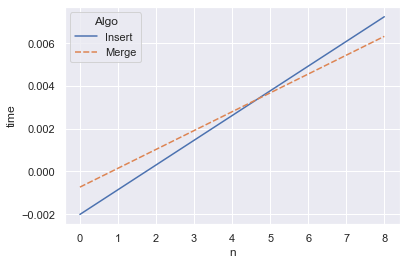

In [15]:
sns.lineplot(data=predDataDF, x='n', y='time', hue='Algo', style='Algo')

# Empirically determining best `n` to use for Hybrid Sort

In [16]:
### Importing data
findBestN = pd.read_csv('./result/result_hybridAnalysis.csv')

In [17]:
findBestN

,sizeOfArray,threshold,time,comparrisons
0,2,1,0.004292,1
1,2,2,0.003099,1
2,2,3,0.000954,1
3,2,4,0.000715,1
4,2,5,0.001192,1
...,...,...,...,...
791995,100,4,0.138998,552
791996,100,5,0.137806,557
791997,100,6,0.149012,608
791998,100,7,0.144005,644


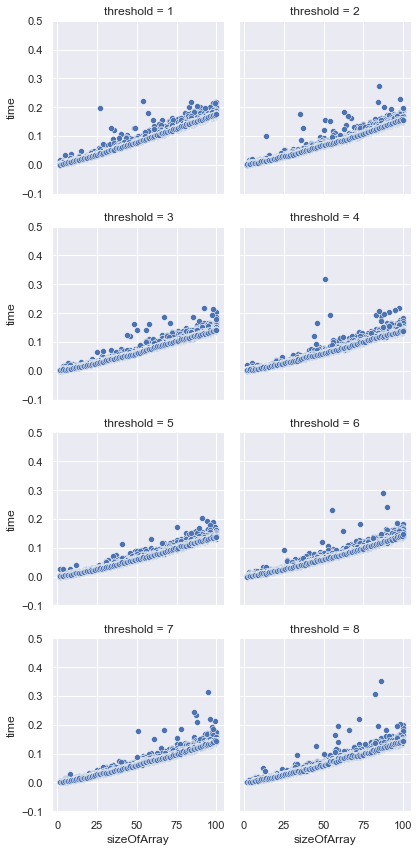

In [18]:
### Graphing scatter plot of df
hybridNPlot = sns.FacetGrid(findBestN, col="threshold", col_wrap=2, height=3, ylim=((-0.1,0.5)))
hybridNPlot.map(sns.scatterplot, "sizeOfArray", "time")

From the FacetGrid plot above, we can notice an interestingtrend where when `n=odd` there are less outliers than when `n=even`.

In [19]:
### Scoring each linear regression

hybridDataDict = {
    'threshold': [],
    'score': [],
    'time': [],
    'variance': [],
    'algo': []
}

for i in range(1,9):
    curHybridData = findBestN[findBestN['threshold']==i]
    x = curHybridData['sizeOfArray'].to_numpy().reshape((-1,1))
    y = curHybridData['time']
    curHybridLinReg = LinearRegression().fit(x, y)
    print(f"Threshold: {i} \tScore: {curHybridLinReg.score(x,y)}\tMean time: {curHybridData['time'].sum()/curHybridData.shape[0]}\tVariance: {curHybridData.var()['time']}")
    
    hybridDataDict['threshold'].append(i)
    hybridDataDict['score'].append(curHybridLinReg.score(x,y))
    hybridDataDict['time'].append(curHybridData['time'].sum()/curHybridData.shape[0])
    hybridDataDict['variance'].append(curHybridData.var()['time'])
    hybridDataDict['algo'].append('hybridSort')

Threshold: 1 	Score: 0.9960141038160633	Mean time: 0.08327144083350593	Variance: 0.0026913284593179814
Threshold: 2 	Score: 0.9921645746283078	Mean time: 0.07190951193221891	Variance: 0.002133155538990944
Threshold: 3 	Score: 0.9947282398863578	Mean time: 0.06665191505894516	Variance: 0.0018037706028732317
Threshold: 4 	Score: 0.9926571457147356	Mean time: 0.06515739180824973	Variance: 0.00177797455416875
Threshold: 5 	Score: 0.9934020313754524	Mean time: 0.06435896892740267	Variance: 0.0017406232672346844
Threshold: 6 	Score: 0.9918769817728845	Mean time: 0.06473156418463195	Variance: 0.001774938460349402
Threshold: 7 	Score: 0.9775303902698901	Mean time: 0.0652219285868635	Variance: 0.0018044678260627255
Threshold: 8 	Score: 0.9869030634080195	Mean time: 0.0660786869549992	Variance: 0.0017957069348567202


Text(0.5, 1.0, 'Comparing Variance')

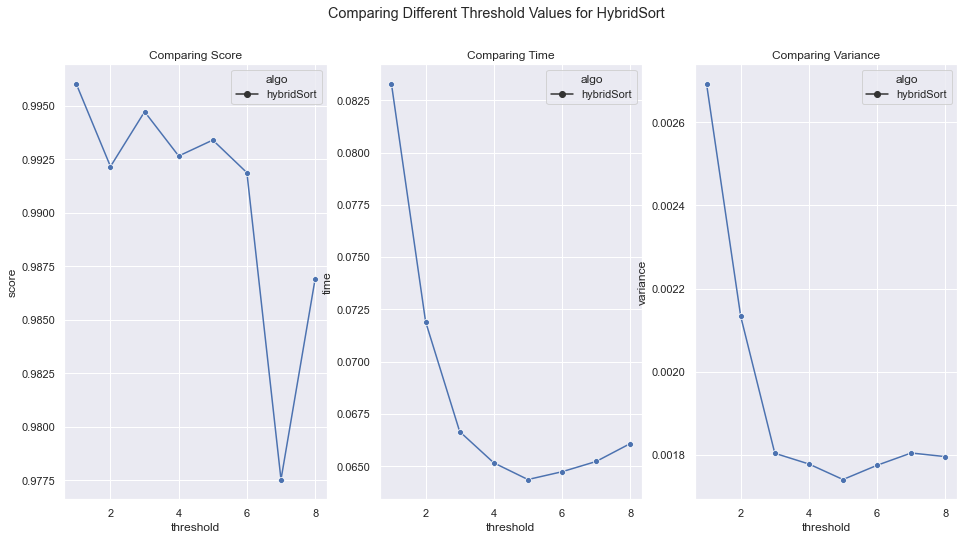

In [20]:
### Creating dataframe from above
hybridDataDF = pd.DataFrame.from_dict(hybridDataDict)

### Plotting data from above
figHybrid, axHybrid = plt.subplots(1, 3, figsize=(16, 8), sharey=False)
figHybrid.suptitle('Comparing Different Threshold Values for HybridSort')

sns.lineplot(ax=axHybrid[0], data=hybridDataDF, x="threshold", y="score", markers=True, style="algo")
axHybrid[0].set_title("Comparing Score")

sns.lineplot(ax=axHybrid[1], data=hybridDataDF, x="threshold", y="time", markers=True, style="algo")
axHybrid[1].set_title("Comparing Time")

sns.lineplot(ax=axHybrid[2], data=hybridDataDF, x="threshold", y="variance", markers=True, style="algo")
axHybrid[2].set_title("Comparing Variance")

## Graphing Insertion Sort, Merge Sort, and Hybrid of both sorts

### Importing data from CSV file

In [21]:
# Import data for all 3 sorts

dataInsertMergeHybridSmallN = pd.read_csv("./result/result_InsertMergeHybridFocusedN_5.csv")

dataInsertMergeHybridSmallN.head()

,n,algo,time,comparisons
0,2,insert,0.003815,1
1,2,merge,0.003099,1
2,2,hybrid,0.003099,1
3,3,insert,0.002861,3
4,3,merge,0.004053,3


### Filter by Algorithm used

In [22]:
# Filter by algorithm type
dataInsertSmallN = dataInsertMergeHybridSmallN[(dataInsertMergeHybridSmallN['algo'] == "insert")]
dataMergeSmallN = dataInsertMergeHybridSmallN[(dataInsertMergeHybridSmallN['algo'] == "merge")]
dataHybridSmallN = dataInsertMergeHybridSmallN[(dataInsertMergeHybridSmallN['algo'] == "hybrid")]

### Plot scatter plots of the three Algorithms

Text(0.5, 1.0, 'Hybrid')

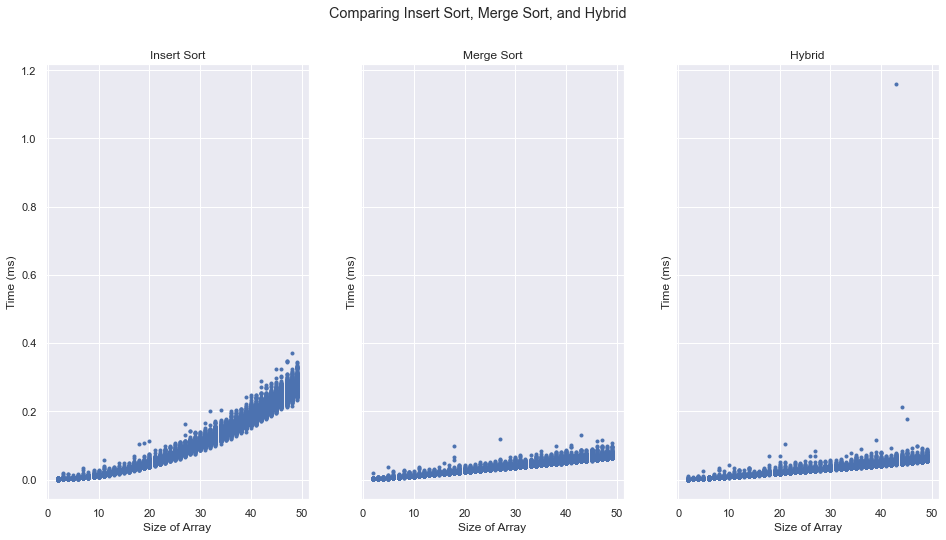

In [23]:
fig4, ax4 = plt.subplots(1, 3, figsize=(16,8), sharey=True)

fig4.suptitle("Comparing Insert Sort, Merge Sort, and Hybrid")

ax4[0].plot(dataInsertSmallN['n'],dataInsertSmallN['time'], '.')
ax4[0].set_ylabel('Time (ms)')
ax4[0].set_xlabel('Size of Array')
ax4[0].set_title('Insert Sort')

ax4[1].plot(dataMergeSmallN['n'],dataMergeSmallN['time'], '.')
ax4[1].set_ylabel('Time (ms)')
ax4[1].set_xlabel('Size of Array')
ax4[1].set_title('Merge Sort')

ax4[2].plot(dataHybridSmallN['n'],dataHybridSmallN['time'], '.')
ax4[2].set_ylabel('Time (ms)')
ax4[2].set_xlabel('Size of Array')
ax4[2].set_title('Hybrid')

### Narrow down `N`

Text(0.5, 1.0, 'Hybrid')

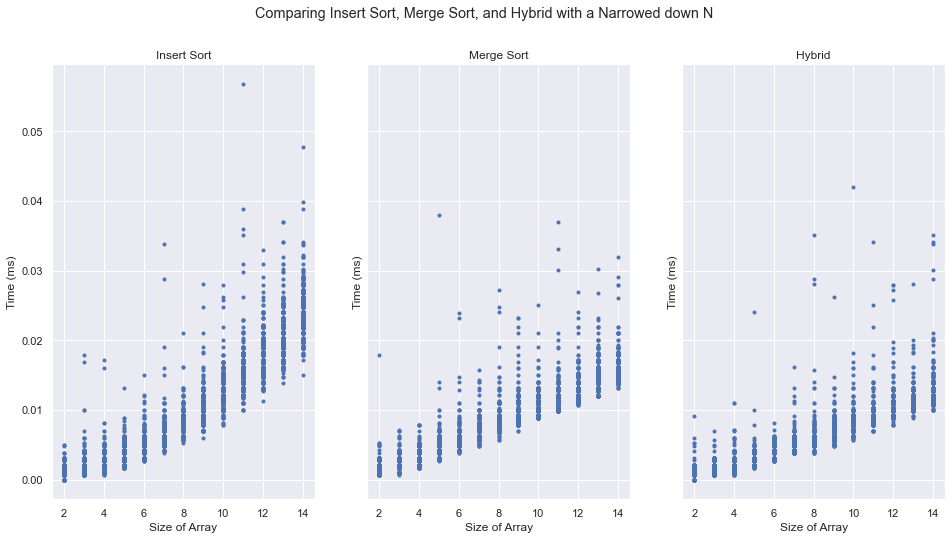

In [24]:
narrow = 15

dataInsertNarrowN = dataInsertSmallN[(dataInsertSmallN['n'] < narrow)]
dataMergeNarrowN = dataMergeSmallN[(dataMergeSmallN['n'] < narrow)]
dataHybridNarrowN = dataHybridSmallN[(dataHybridSmallN['n'] < narrow)]

fig5, ax5 = plt.subplots(1, 3, figsize=(16,8), sharey=True)

fig5.suptitle("Comparing Insert Sort, Merge Sort, and Hybrid with a Narrowed down N")

ax5[0].plot(dataInsertNarrowN['n'],dataInsertNarrowN['time'], '.')
ax5[0].set_ylabel('Time (ms)')
ax5[0].set_xlabel('Size of Array')
ax5[0].set_title('Insert Sort')

ax5[1].plot(dataMergeNarrowN['n'],dataMergeNarrowN['time'], '.')
ax5[1].set_ylabel('Time (ms)')
ax5[1].set_xlabel('Size of Array')
ax5[1].set_title('Merge Sort')

ax5[2].plot(dataHybridNarrowN['n'],dataHybridNarrowN['time'], '.')
ax5[2].set_ylabel('Time (ms)')
ax5[2].set_xlabel('Size of Array')
ax5[2].set_title('Hybrid')

### Using Linear Regression to predict best `N` (WIP)

<AxesSubplot:xlabel='n', ylabel='Time'>

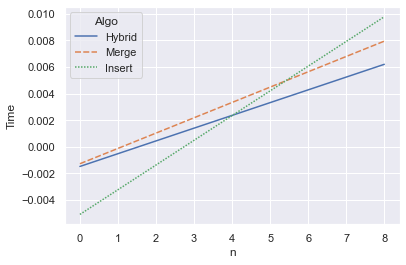

In [26]:
n_Reshaped = dataInsertNarrowN['n'].to_numpy().reshape((-1,1))

insert_Model = LinearRegression().fit(n_Reshaped, dataInsertNarrowN['time'])
merge_Model = LinearRegression().fit(n_Reshaped, dataMergeNarrowN['time'])
hybrid_Model = LinearRegression().fit(n_Reshaped, dataHybridNarrowN['time'])

range_Of_X = np.arange(9).reshape((-1,1))
insertPredict = insert_Model.predict(range_Of_X)
mergePredict = merge_Model.predict(range_Of_X)
hybridPredict = hybrid_Model.predict(range_Of_X)

prediction_Columns = ['n','Algo','Time']

prediction_Data = ({
    'n': [x for x in range(len(hybridPredict))]+[x for x in range(len(mergePredict))]+[x for x in range(len(insertPredict))],
    'Algo': ['Hybrid' for x in range(len(hybridPredict))]+['Merge' for x in range(len(mergePredict))]+['Insert' for x in range(len(insertPredict))],
    'Time': np.concatenate([hybridPredict, mergePredict, insertPredict])
})

prediction_Data_DF = pd.DataFrame.from_dict(prediction_Data)

sns.lineplot(data=prediction_Data_DF, x='n', y='Time', hue='Algo', style='Algo')
